# Categorical Word Frequencies


Within this notebook, we'll explore some text data and compile the top N most frequently occuring terms within categorical groups.

### Import dependencies

In [1]:
import pandas as pd

import math
import matplotlib.pyplot as plt
from matplotlib import gridspec

/Users/yanxu/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


### Load text dataset from SKlearn's [`fetch_20newsgroups`](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html)

SKlearn's [`fetch_20newsgroups`](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html) is a pre-compiled dataset that (as its name entails) offers news data for 20 different categories.

In [2]:
from sklearn.datasets import fetch_20newsgroups

# define which categories we'd like to use
categories = [
    'alt.atheism',
    'comp.graphics',
    'comp.sys.ibm.pc.hardware',
    'comp.windows.x',
    'misc.forsale',
    'rec.autos',
    'sci.space',
    'rec.motorcycles',
    'rec.sport.baseball',
    'sci.crypt']

news = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'),
                          categories=categories)
# documents
docs = news.data

# categories
cats = news.target

# Convert to pandas DataFrame
df = pd.DataFrame({"body": docs, "category": [news.target_names[x] for x in cats]})

# how many documents per category?
pd.value_counts(df['category'])

rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
comp.windows.x              593
sci.space                   593
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
alt.atheism                 480
Name: category, dtype: int64

## NOTICE!! Uncomment out this code to apply the preprocessing stages that remove low-value terms

If you're using this cell, then you should comment out the code in the following cell.

In [3]:
from utils import clean_text
df['body_tokens'] = df['body'].apply(clean_text)

### Use pandas `apply` to broadcast the `split` function to every row's _body_ column

Using the pandas `apply` function allows us to broadcast a function over all values of a particular column of a DataFrame (or a Series). Within the `apply` function, `lambda` is acting similar to a JavaScript arrow function. It is an abbreviated way to write a function. In the cell below, we're passing `x` as an argument and returning `x.split()`.

In [4]:
# df['body_tokens'] = df['body'].apply(x.split())

# df.head()

### Group dataframe by category and combine each record's list of clean tokens

Performing a _sum_ aggregation on a column that contains lists will merge the lists into one.

In [5]:
group_df = df.groupby('category').agg({'body_tokens': 'sum'})
group_df

,body_tokens
category,
alt.atheism,"[course, incorrect, defending, islam, defendin..."
comp.graphics,"[cview, anymore, explaind, thread, go, fault, ..."
comp.sys.ibm.pc.hardware,"[anyone, taken, look, viewsonic, claim, 1280x1..."
comp.windows.x,"[anyone, know, shading, program, based, xlib, ..."
misc.forsale,"[looking, sharp, 6220, travelmate, 2000, part,..."
rec.autos,"[fact, make, sell, yous, sunny, california, wa..."
rec.motorcycles,"[periodic, posting, intended, answer, frequent..."
rec.sport.baseball,"[maybe, baseball, business, responsible, fisca..."
sci.crypt,"[nice, think, naive, fact, million, people, to..."


### Explore the number of tokens by category

Below we're computing 3 metrics:
1. **Number of tokens** - Calculated by simply finding the length of each category's list of tokens
2. **Number of _unique_ tokens** - Calculated by first reducing the list of tokens down to unique values using the `set` function, then finding the length
3. **Lexical Diversity** - Defined as the ratio of unique terms to total terms

In [6]:
explore_df = pd.DataFrame({"Total Number of Tokens": group_df['body_tokens'].apply(lambda x: len(x)),
                        "Number of Unique Tokens": group_df['body_tokens'].apply(lambda x: len(set(x)))})

explore_df["Lexical Diversity"] = explore_df['Number of Unique Tokens'] / explore_df['Total Number of Tokens']

explore_df

,Total Number of Tokens,Number of Unique Tokens,Lexical Diversity
category,,,
alt.atheism,40251,7751,0.192567
comp.graphics,44895,9673,0.215458
comp.sys.ibm.pc.hardware,34056,6998,0.205485
comp.windows.x,66439,10824,0.162916
misc.forsale,30546,7803,0.255451
rec.autos,29911,7025,0.234863
rec.motorcycles,28103,7178,0.255418
rec.sport.baseball,32082,6443,0.200829
sci.crypt,76644,12033,0.156999


### Plot the Lexical Diversity

Keep in mind that we don't know the origin of this data, or the number of authors that generated the underlying records, so conclusions based purely on the aggregate-level diversity scores may be skewed.

<AxesSubplot:ylabel='category'>

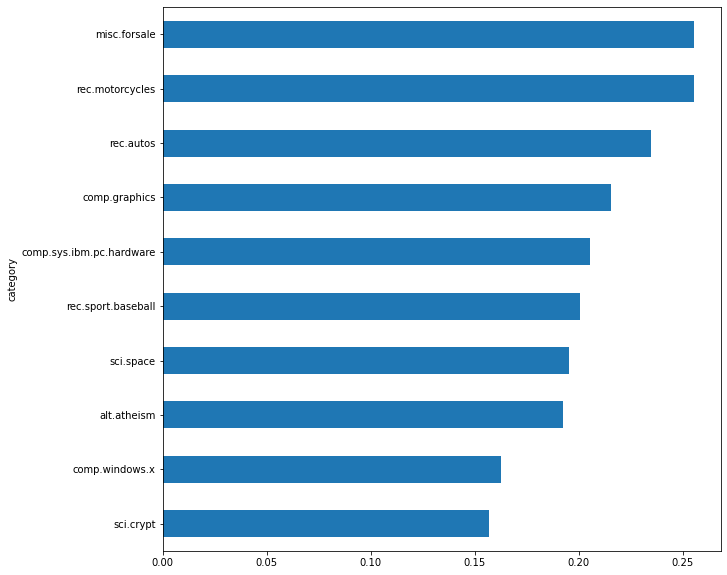

In [7]:
explore_df['Lexical Diversity'].sort_values().plot.barh(figsize=(10,10))

### Count the frequencies of each term in the word lists and return the top n most frequent

Below we're using the [`Counter`](https://docs.python.org/3/library/collections.html#collections.Counter) function which receives an iterable object and returns a dictionary with each unique token's frequency. Then, we're using a combination of `sorted` and `operator.itemgetter` to perform a reverse sort on a dictionary by its values, as opposed to sorting by the keys.

In [8]:
from collections import Counter
import operator

def wordListToFreqList(wordlist, top_n=10):
    """Compile a list of all words and their frequency of occurence"""
    
    # count each term's number of occurrences
    freqDict = Counter(wordlist)
    
    # sort the frequency dictionary by its values descending and return the items as a list of tuples
    sortedFreqs = sorted(freqDict.items(), key=operator.itemgetter(1), reverse=True)
    
    return sortedFreqs[:top_n]

freqs = group_df['body_tokens'].apply(lambda x: wordListToFreqList(x))
freqs

category
alt.atheism                 [(people, 331), (atheist, 257), (think, 228), ...
comp.graphics               [(image, 673), (file, 471), (program, 292), (g...
comp.sys.ibm.pc.hardware    [(drive, 726), (card, 352), (system, 290), (di...
comp.windows.x              [(file, 750), (window, 680), (program, 520), (...
misc.forsale                [(sale, 248), (offer, 245), (price, 193), (ema...
rec.autos                   [(car, 199), (good, 146), (time, 140), (engine...
rec.motorcycles             [(bike, 426), (know, 149), (ride, 136), (motor...
rec.sport.baseball          [(year, 384), (game, 342), (team, 268), (playe...
sci.crypt                   [(encryption, 545), (chip, 531), (system, 484)...
sci.space                   [(space, 832), (launch, 309), (nasa, 290), (sa...
Name: body_tokens, dtype: object

### Plot the most frequently occurring terms for each category

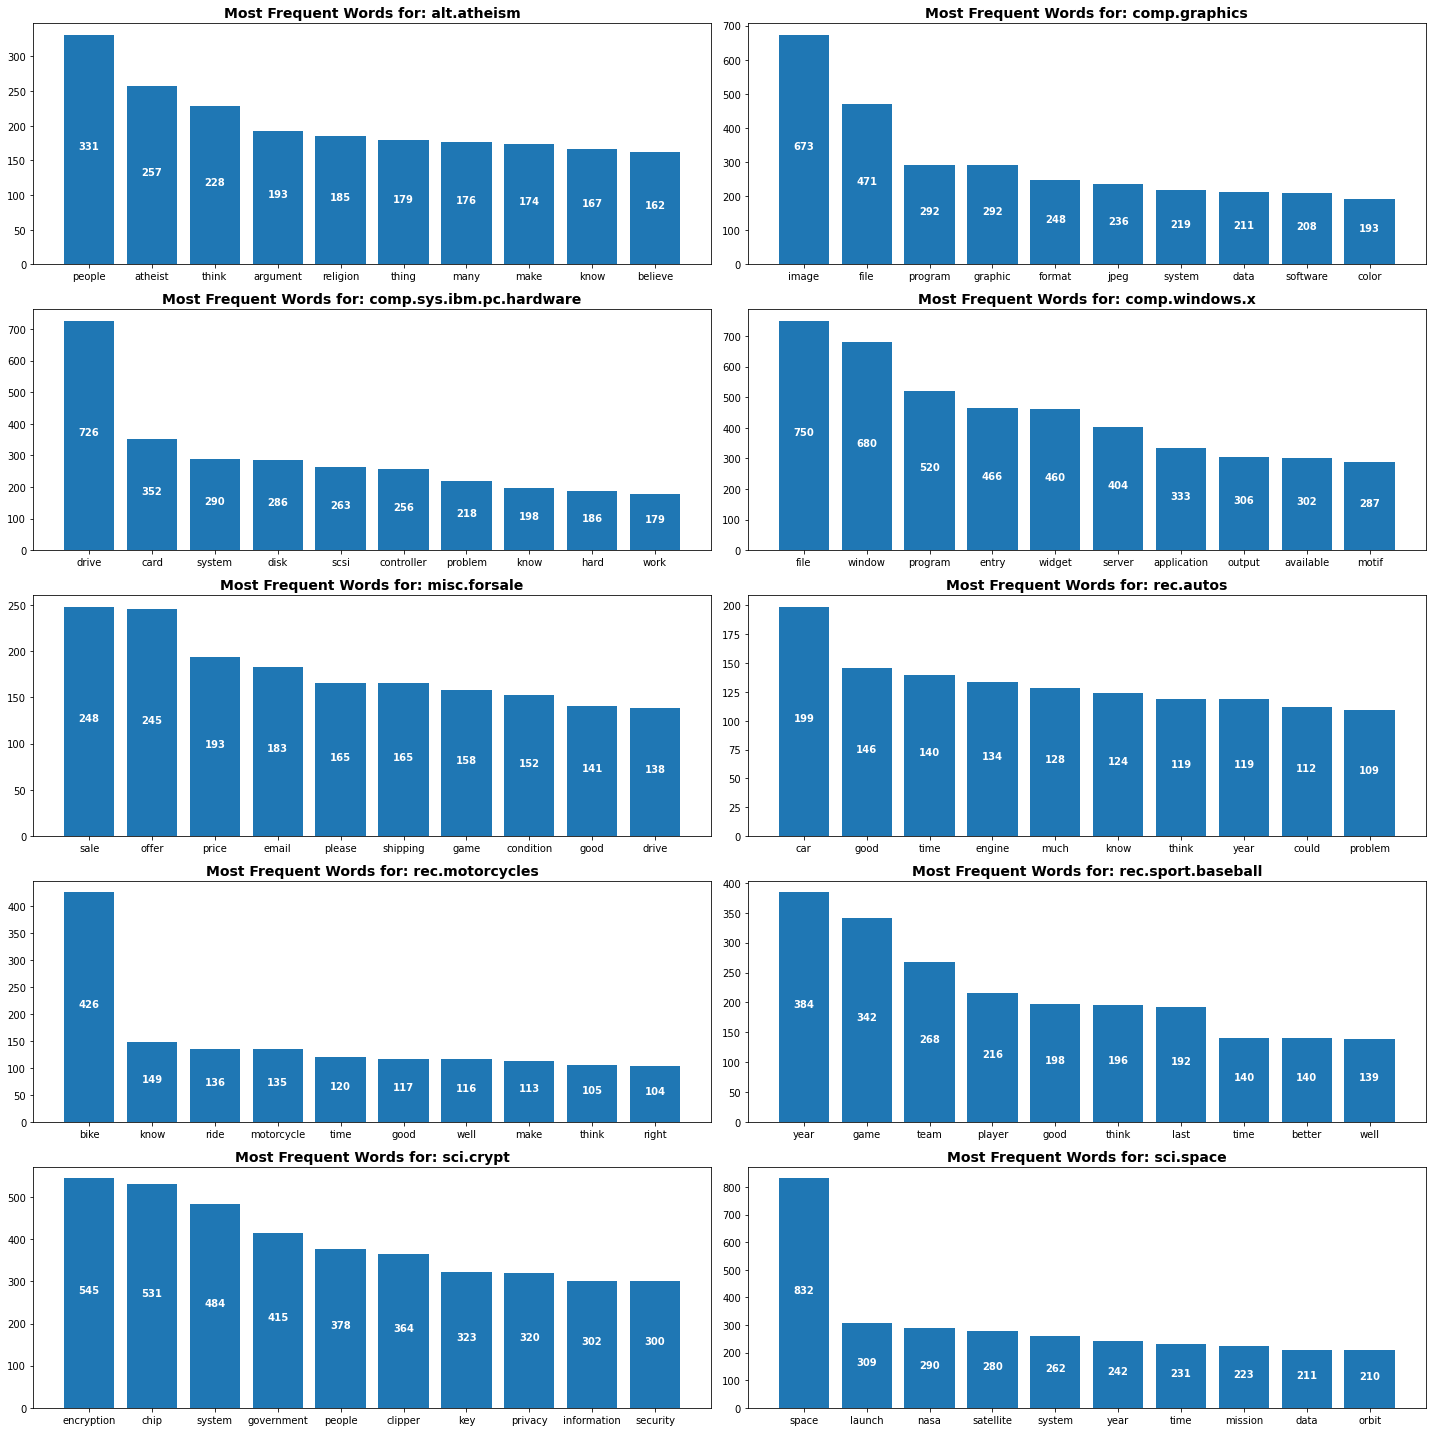

In [9]:
# Using gridspec allows us to dynamically add subplots in grid
N = len(categories)
cols = 2
rows = int(math.ceil(N / cols))
gs = gridspec.GridSpec(rows, cols)

# define the figure space for the plots
fig = plt.figure()
fig.set_figheight(N*2)
fig.set_figwidth(20)

# iterate over number of categories to plot each one's top terms
for i in range(N):
    
    # add a plot to the figure
    ax = fig.add_subplot(gs[i])
    ax.set_title(f"Most Frequent Words for: {news.target_names[i]}", fontsize=14, fontweight='bold')
    
    # break the terms and term counts into two lists/tuples
    x,y = zip(*freqs[i])
    
    #plot the data
    ax.bar(x,y)
    
    # place numeric label on the bar
    for j, v in enumerate(y):
        ax.text(j, v/2, str(v), color='white', fontweight='bold', ha='center')
        
fig.tight_layout()